Foreground image to foreground:

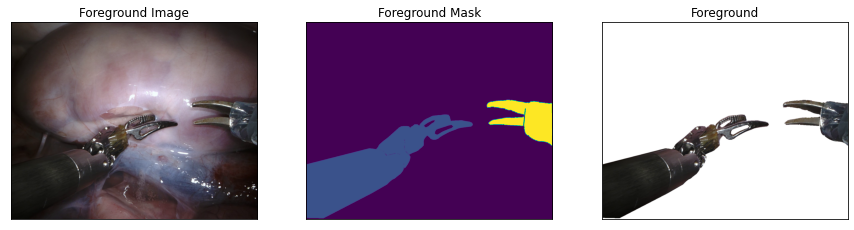

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

fg_img = Image.open('../data_gen/foreground/1-Bipolar_Forceps/image_3/seq_10_frame017.png')
fg_mask = Image.open('../data_gen/foreground/1-Bipolar_Forceps/mask/seq_10_frame017.png')
images = np.expand_dims(np.array(fg_img), axis=0)
segmaps = np.expand_dims(np.array(fg_mask), axis=0)
segmaps = np.expand_dims(segmaps, axis=3)
images = np.squeeze(images)
segmaps = np.squeeze(segmaps)
image_pil = Image.fromarray(images).convert('RGBA')
mask_pil = Image.fromarray(segmaps).convert('RGBA')

image_np = np.array(image_pil)
mask_np = np.array(mask_pil)

image_np[mask_np[:,:,:]==0] = 255
fg = Image.fromarray(image_np)

num_img = 3
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(fg_img)
ax[0].set_title('Foreground Image')
ax[1].imshow(fg_mask)
ax[1].set_title('Foreground Mask');
ax[2].imshow(fg, cmap='gray')
ax[2].set_title('Foreground');

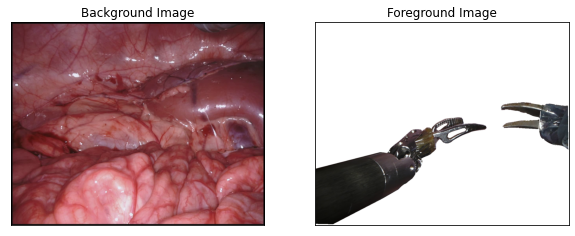

In [2]:
bg = Image.open('../data_gen/background/raw/3-frame020.png')#.convert('RGBA')
num_img = 2
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(bg)
ax[0].set_title('Background Image')
ax[1].imshow(fg)
ax[1].set_title('Foreground Image');

Blend images and create corresponding mask:

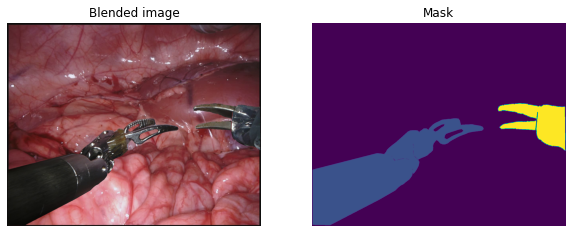

In [3]:
# make fg transparent
image_pos = Image.fromarray(image_np)
datas = image_pos.getdata()
newData = []
for items in datas:
    if items[0] == 255 and items[1] == 255 and items[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(items)
image_pos.putdata(newData)

# blend via paste
blended = bg.copy()
blended.paste(image_pos, image_pos)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.axis('off')
plt.title('Blended image')
plt.imshow(blended)
plt.subplot(122)
plt.axis('off')
plt.title('Mask')
plt.imshow(fg_mask)
